## Local Outlier Factor Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

In [2]:
# Set random seed for reproductibility
np.random.seed(42)

In [3]:
## Create Dataset with normal data and introduce anomalies
X,y=make_blobs(n_samples=300,centers=1,cluster_std=0.6,random_state=42)

In [4]:
## Adding Anomalies to the dataset
X_anomalies=np.random.uniform(low=-6,high=6,size=(20,2))
X_full=np.concatenate([X,X_anomalies],axis=0)

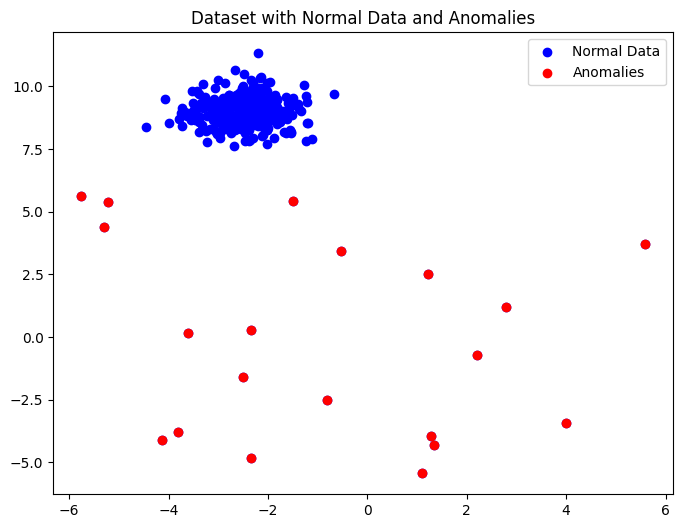

In [5]:
## Plot the Dataset with anomalies
plt.figure(figsize=(8,6))
plt.scatter(X_full[:,0],X_full[:,1],color='b', label="Normal Data")
plt.scatter(X_anomalies[:,0],X_anomalies[:,1], color='r', label="Anomalies")
plt.title('Dataset with Normal Data and Anomalies')
plt.legend()
plt.show()

In [7]:
## Apply LOF
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.05)
y_pred=lof.fit_predict(X_full)

In [8]:
## Fetch LOF Scores
lof_score=-lof.negative_outlier_factor_

In [9]:
lof_score

array([0.99804033, 1.02246642, 1.45753812, 0.9855285 , 1.44426542,
       1.01089614, 0.9771241 , 1.08707597, 0.99156995, 0.96652437,
       1.05236974, 1.0104075 , 1.01936322, 0.99093492, 0.98970453,
       0.98040773, 1.02376707, 1.20911267, 1.00953201, 1.16086341,
       1.08887829, 1.19646001, 0.98581083, 1.09678643, 1.17273626,
       1.02379847, 1.09618254, 1.46402157, 1.00014737, 1.18663223,
       1.22717046, 0.96800521, 0.98175962, 0.97963424, 0.99731433,
       0.98737331, 1.01656283, 0.99851815, 1.08333573, 1.11306897,
       0.97766786, 0.96962433, 1.04332822, 0.99663659, 1.38007066,
       1.02030326, 1.20801524, 1.16939771, 0.98010211, 1.12594579,
       1.01624182, 0.97972887, 1.22701503, 1.55893222, 1.35939216,
       0.98042288, 0.99792259, 1.04000349, 1.01831085, 1.05884695,
       1.03474575, 1.02835724, 1.00028382, 1.17123786, 1.0583566 ,
       1.03437041, 1.56058233, 1.00947125, 0.99516832, 0.97759468,
       1.00840498, 1.58240866, 1.01058652, 1.59474885, 1.02213

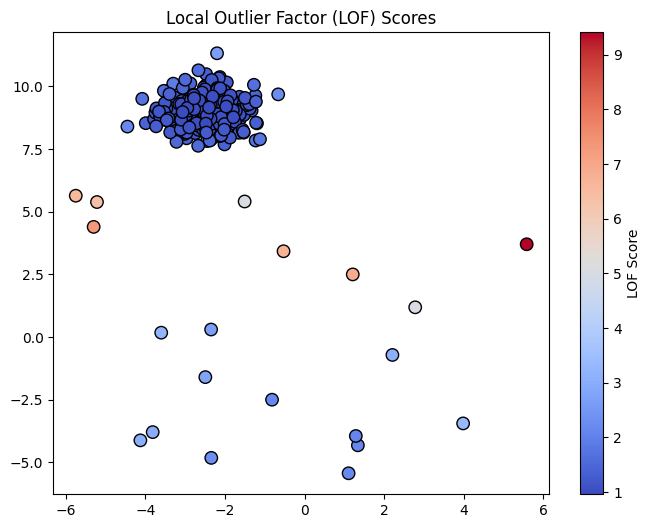

In [11]:
#  Plot LOF scores (anomalies vs normal data)
plt.figure(figsize=(8, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], c=lof_score, cmap='coolwarm', s=80, edgecolor='k')
plt.colorbar(label='LOF Score')
plt.title('Local Outlier Factor (LOF) Scores')
plt.show()

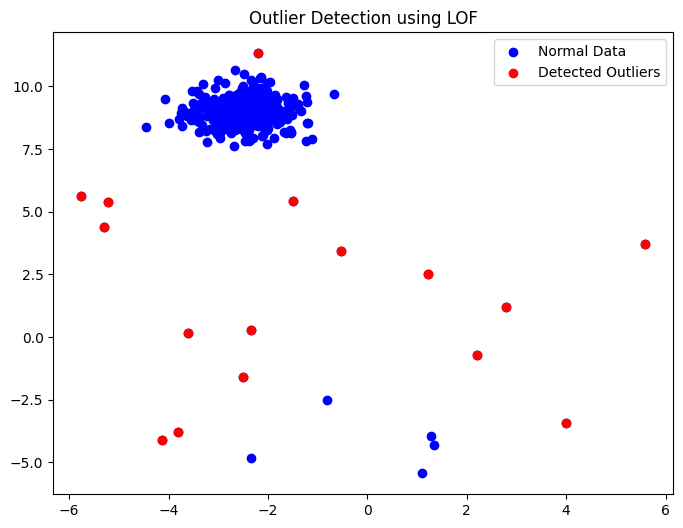

In [12]:
## Identify outliers
outliers = X_full[y_pred == -1]
plt.figure(figsize=(8, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], color='b', label='Normal Data')
plt.scatter(outliers[:, 0], outliers[:, 1], color='r', label='Detected Outliers')
plt.title('Outlier Detection using LOF')
plt.legend()
plt.show()